In [1]:
import os
import csv
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
ansatz_str = 'UCCSD'
path = f'hydrogen_aer_{ansatz_str}'
optimizer_str = ['COBYLA', 'SPSA']

In [3]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [4]:
for optimizer in optimizer_str:
    globals()[f'distance_{optimizer}'] = []
    globals()[f'energy_dif_{optimizer}'] = []

    files = [file for file in os.listdir(f'{path}/results_{optimizer}') if file.endswith('.csv')]
    files = sorted(files, key=ordenar_por_numero)

    for index, file in enumerate(files):

        globals()[f'distance_{optimizer}'].append([])
        globals()[f'energy_dif_{optimizer}'].append([])
        
        with open(f'{path}/results_{optimizer}/{file}', 'r') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            for row in reader:
                globals()[f'distance_{optimizer}'][index].append(float(row[0]))
                globals()[f'energy_dif_{optimizer}'][index].append(float(row[1]) - float(row[2]))

    globals()[f'files_names_{optimizer}'] = [file.split('.')[0] for file in files]

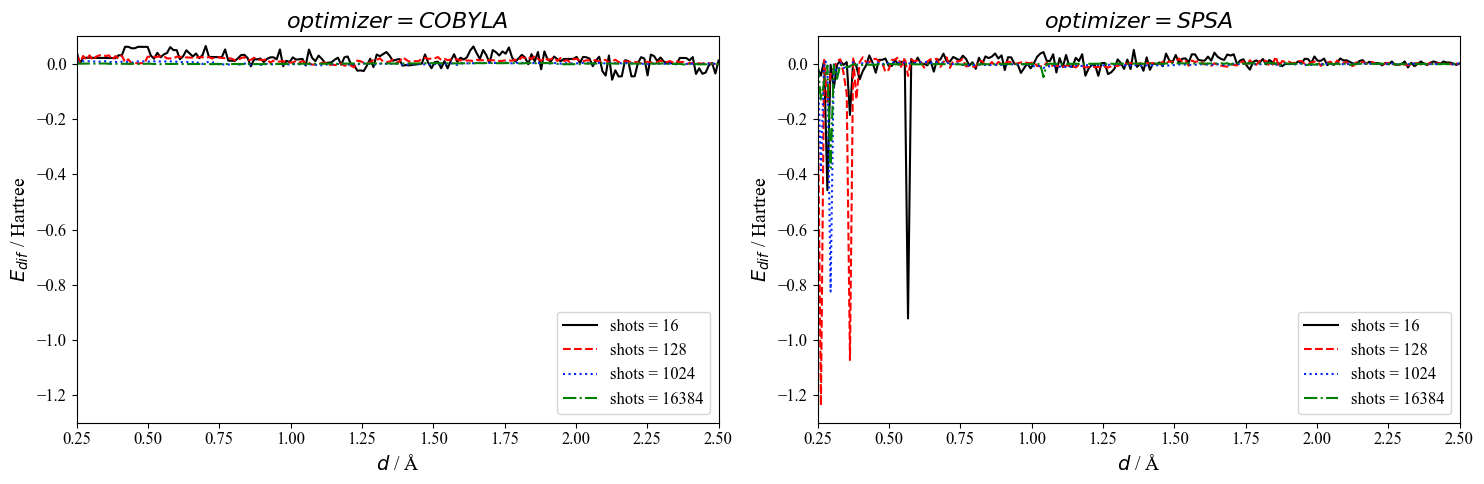

In [5]:
colors = ['black', 'red', '#0027FF', 'green']
lines = ['-', '--', ':', '-.']

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

for i, optimizer in enumerate(optimizer_str):
    row = 1
    column = i % columns

    for n, file in enumerate(globals()[f'files_names_{optimizer}']):
        axs[column].plot(globals()[f'distance_{optimizer}'][n], globals()[f'energy_dif_{optimizer}'][n],
                         color=colors[n], marker='', linestyle=lines[n], label=f'{file.split('=')[0]} = {file.split('=')[-1]}')
        axs[column].set_title(f'$optimizer={optimizer}$', fontsize=16)
        axs[column].set_xlabel('$d$ / Å', fontsize=14)
        axs[column].set_ylabel('$E_{dif}$ / Hartree', fontsize=14)
        axs[column].grid(False)
        axs[column].set_xlim(0.25, 2.5)
        axs[column].set_ylim(-1.3, 0.1)
        axs[column].legend(loc='lower right')
        

plt.tight_layout()
plt.savefig(f'{path}/hydrogen_aer_{ansatz_str}_error.png')
plt.savefig(f'../../../TFG/Figuras/hydrogen_aer_{ansatz_str}_error.png')
plt.show()

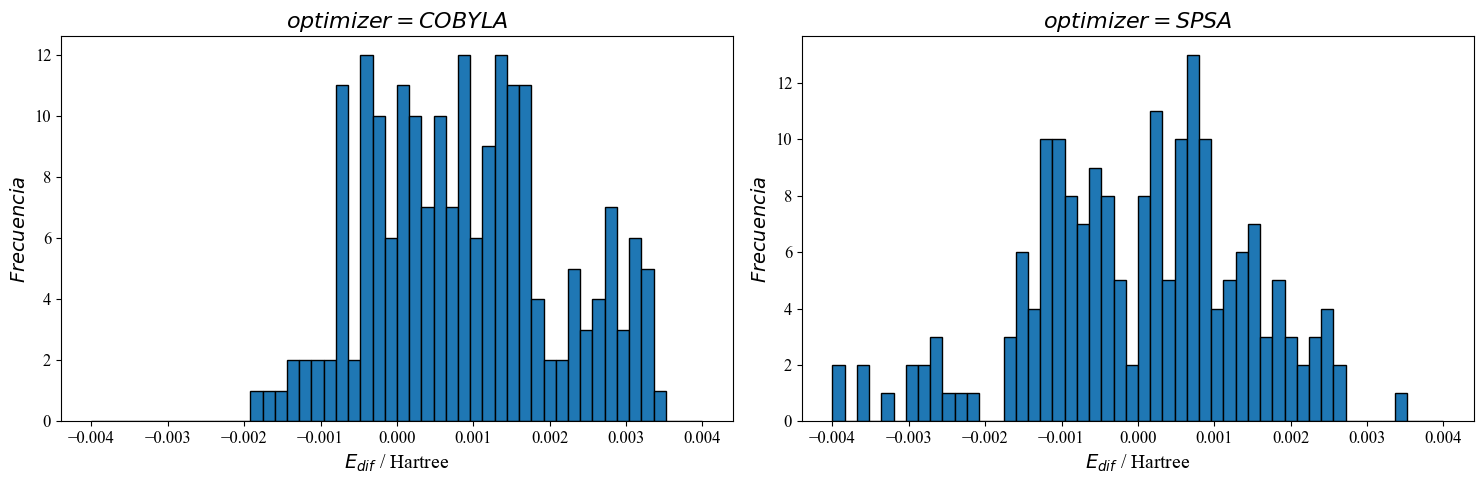

In [6]:
rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

min_value = -0.004
max_value = 0.004
num_bins = 50
bins = np.linspace(min_value, max_value, num_bins + 1)

for i, optimizer in enumerate(optimizer_str):
    row = 1
    column = i % columns

    for n, file in enumerate(globals()[f'files_names_{optimizer}']):
        if file == 'shots=16384':
            axs[column].hist(globals()[f'energy_dif_{optimizer}'][n], bins=bins, edgecolor='black')
            axs[column].set_title(f'$optimizer={optimizer}$', fontsize=16)
            axs[column].set_xlabel('$E_{dif}$ / Hartree', fontsize=14)
            axs[column].set_ylabel('$Frecuencia$', fontsize=14)
            axs[column].grid(False)
            # axs[column].set_xlim(-0.45, 0.1)
            # axs[column].legend(loc='lower right')
        

plt.tight_layout()
plt.savefig(f'{path}/hydrogen_aer_{ansatz_str}_histogram_optimizers.png')
plt.savefig(f'../../../TFG/Figuras/hydrogen_aer_{ansatz_str}_histogram_optimizers.png')
plt.show()

In [7]:
for optimizer in optimizer_str:
    for n, file in enumerate(globals()[f'files_names_{optimizer}']):
        print(optimizer)
        print(file)
        print(f'    {np.mean(globals()[f'energy_dif_{optimizer}'][n])}')
        print(f'    {np.std(globals()[f'energy_dif_{optimizer}'][n])}')

COBYLA
shots=16
    0.016938015918668472
    0.023751321024658767
COBYLA
shots=128
    0.01293355050789896
    0.008935543749548582
COBYLA
shots=1024
    0.0021558831529084653
    0.003678633678064231
COBYLA
shots=16384
    0.0008860193205510636
    0.0012126693814126256
SPSA
shots=16
    -0.00264205968461567
    0.07635750497788024
SPSA
shots=128
    -0.012646717915882311
    0.11673937980509014
SPSA
shots=1024
    -0.0077633547687926095
    0.06407717161695818
SPSA
shots=16384
    -0.0035870721390507177
    0.02875691351480625


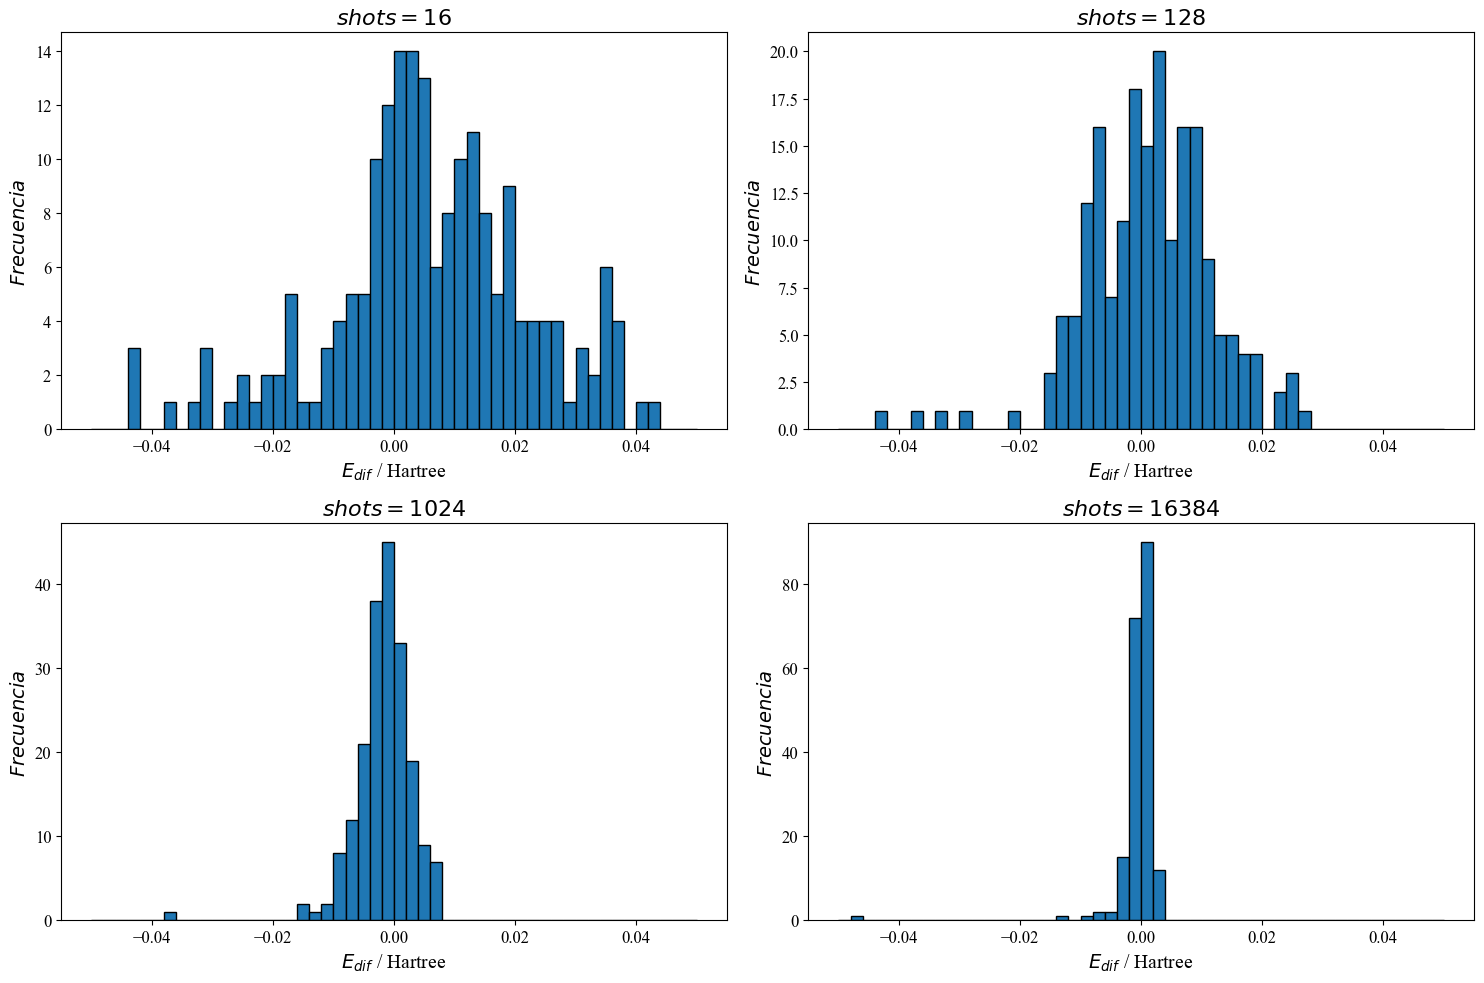

In [8]:
rows = 2
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 10))

min_value = -0.05
max_value = 0.05
num_bins = 50
bins = np.linspace(min_value, max_value, num_bins + 1)


for n, file in enumerate(globals()[f'files_names_COBYLA']):
    row = n // columns
    column = n % columns

    axs[row, column].hist(globals()[f'energy_dif_{optimizer}'][n], bins=bins, edgecolor='black')
    axs[row, column].set_title(f'${file}$', fontsize=16)
    axs[row, column].set_xlabel('$E_{dif}$ / Hartree', fontsize=14)
    axs[row, column].set_ylabel('$Frecuencia$', fontsize=14)
    axs[row, column].grid(False)
    # axs[column].set_xlim(-0.45, 0.1)
    # axs[column].legend(loc='lower right')
        

plt.tight_layout()
plt.savefig(f'{path}/hydrogen_aer_{ansatz_str}_histogram_shots.png')
plt.savefig(f'../../../TFG/Figuras/hydrogen_aer_{ansatz_str}_histogram_shots.png')
plt.show()